In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import cv2
import random as rd
import skimage

In [10]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
BATCH_SIZE = 32 

EPOCHS = 10

COLORS = 3

In [13]:
from tensorflow import keras
from keras.layers import Dense, Conv2D
from keras.layers import BatchNormalization, Flatten, Dropout, MaxPooling2D, UpSampling2D
from keras.layers import RandomFlip, RandomHeight, RandomCrop, RandomRotation, RandomZoom, RandomWidth
from keras import Sequential
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

In [19]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import optimizers

conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
# conv_base.summary()

94765736/94765736 [==============================] - 47s 0us/step


In [20]:
model = Sequential([
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    conv_base,
    Flatten(),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(10, activation='softmax')
    ])

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['acc'])

In [22]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_images,
                                                              train_labels,
                                                              test_size=0.02,
                                                              random_state=13
                                                              )
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((49000, 32, 32, 3), (1000, 32, 32, 3), (49000, 10), (1000, 10))

In [24]:
history = model.fit(train_X, train_label, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(valid_X, valid_label))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1532/1532 [==============================] - ETA: 0s - loss: 1.4988 - acc: 0.5102WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001869D78FC10> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but sourc

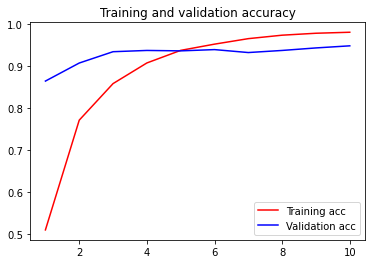

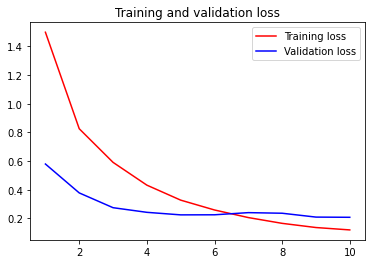

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

## Щойно навчена модель

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 26s 83ms/step - loss: 0.2379 - acc: 0.9407


313/313 [==============================] - 24s 78ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

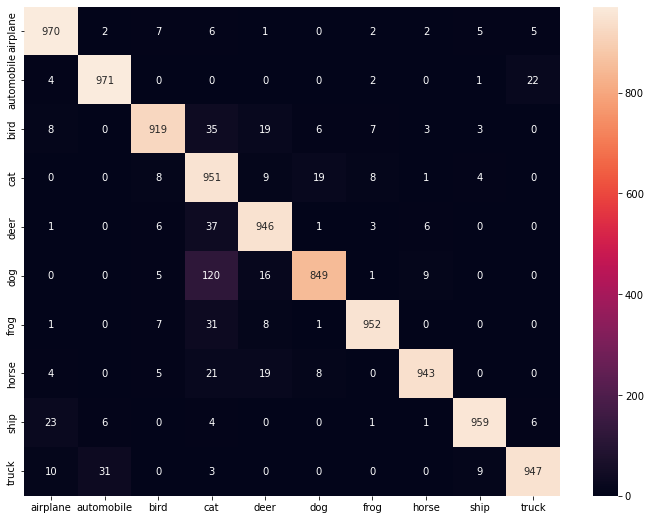

In [31]:
import seaborn as sns
import numpy as np
import tensorflow as tf
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predict the values from the validation dataset
y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors t_del
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

## Збереження моделі і вагів

In [33]:
model.save('model_from_Susana.h5')
model.save_weights('weights_from_Susana.h5')

## Тест завантаженої моделі

In [35]:
from keras.models import load_model

reload_model = load_model("C:/Users/kuzik/Desktop/project3/models/model_from_Susana.h5")
reload_model.load_weights("C:/Users/kuzik/Desktop/project3/models/weights_from_Susana.h5")

In [37]:
_, (test_x, test_y) = cifar10.load_data()

test_x = test_x.astype("float32") / 255
test_y = to_categorical(test_y)

reload_test_loss, reload_test_acc = reload_model.evaluate(test_x, test_y)

313/313 [==============================] - 26s 82ms/step - loss: 0.2379 - acc: 0.9407


## Тест на картинках з інтернету

In [42]:
from keras.utils import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.image import resize
from keras.models import load_model

def load_image(filename):
    img = load_img(filename)
    img = resize(img, (32, 32))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    x = np.copy(img)
    x = preprocess_input(x).astype("float32") / 255
    return x

def image_classify(filename):
    img = load_image(filename)
    features = reload_model.predict(img)
    top = []
    top_num = 3
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    for request in range(1):  # num of foto or objects on foto
        classes_request = classes
        features_request = features[0]
        rang = 1
        for i in range(top_num):
            pred = np.argmax(features_request)
            top.append([rang, classes_request[pred], round(features_request[np.argmax(features_request)], 4)])
            features_request = np.delete(features_request, np.argmax(features_request))
            classes_request.remove(classes_request[pred])
            rang +=1
    i = 0
    for el in top:
        print(f"{top[i][0]}. It is {top[i][1]} with {top[i][2]} chance")
        i += 1


print("")        
print("Must be: Airplane")
image_classify('C:/Users/kuzik/Desktop/1.jpeg')
print("")
print("Must be: Automobile")
image_classify('C:/Users/kuzik/Desktop/2.jpg')
print("") 
print("Must be: Bird")
image_classify('C:/Users/kuzik/Desktop/3.jfif')
print("") 
print("Must be: Cat")
image_classify('C:/Users/kuzik/Desktop/4.jfif')
print("") 
print("Must be: Deer")
image_classify('C:/Users/kuzik/Desktop/5.jfif')
print("")
print("Must be: Dog")
image_classify('C:/Users/kuzik/Desktop/6.jfif')
print("") 
print("Must be: Frog")
image_classify('C:/Users/kuzik/Desktop/7.jfif')
print("") 
print("Must be: Horse")
image_classify('C:/Users/kuzik/Desktop/8.jfif')
print("") 
print("Must be: Ship")
image_classify('C:/Users/kuzik/Desktop/9.jfif')
print("") 
print("Must be: Truck")
image_classify('C:/Users/kuzik/Desktop/10.jfif')


Must be: Airplane
1/1 [==============================] - 0s 25ms/step
1. It is airplane with 0.9918000102043152 chance
2. It is automobile with 0.0027000000700354576 chance
3. It is ship with 0.0012000000569969416 chance

Must be: Automobile
1/1 [==============================] - 0s 25ms/step
1. It is cat with 0.47909998893737793 chance
2. It is ship with 0.14800000190734863 chance
3. It is bird with 0.11590000241994858 chance

Must be: Bird
1/1 [==============================] - 0s 25ms/step
1. It is bird with 0.996999979019165 chance
2. It is cat with 0.000699999975040555 chance
3. It is truck with 0.00039999998989515007 chance

Must be: Cat
1/1 [==============================] - 0s 25ms/step
1. It is cat with 0.9745000004768372 chance
2. It is horse with 0.005400000140070915 chance
3. It is frog with 0.004100000020116568 chance

Must be: Deer
1/1 [==============================] - 0s 25ms/step
1. It is deer with 0.9916999936103821 chance
2. It is cat with 0.0017999999690800905 chan